In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



In [122]:
X = pd.read_csv('autoencoder80_4regions.csv').drop('Unnamed: 0', axis=1)
y = pd.read_csv('train_labels.csv', header=None)

In [125]:
train_scaler = StandardScaler()
X = train_scaler.fit_transform(X)

In [126]:
y = pd.Series(y[0].replace({'face':0, 'house':1}))

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [128]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    
}

Logistic Regression:
 accuracy is 0.9074 
 f1 score is 0.9123
SVM:
 accuracy is 0.7963 
 f1 score is 0.7755
Decision Tree:
 accuracy is 0.8889 
 f1 score is 0.8929
Random Forest:
 accuracy is 0.9074 
 f1 score is 0.9123
KNN:
 accuracy is 0.8148 
 f1 score is 0.8077


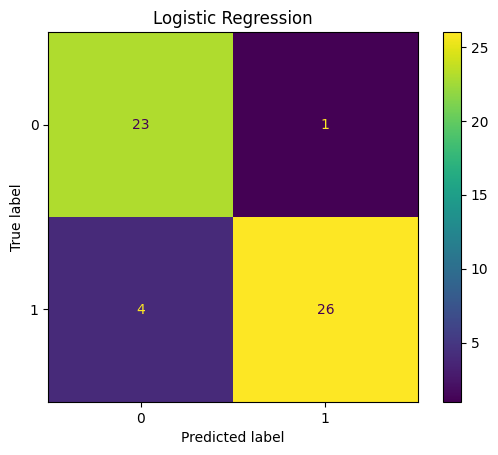

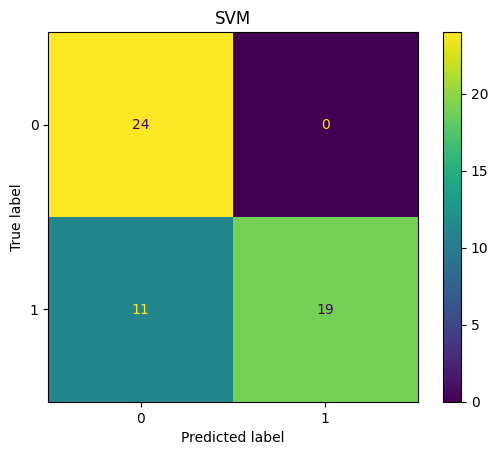

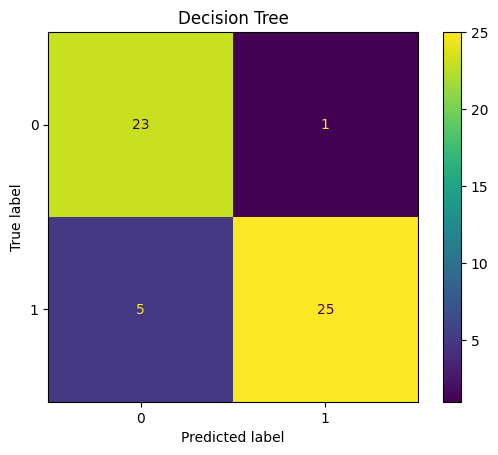

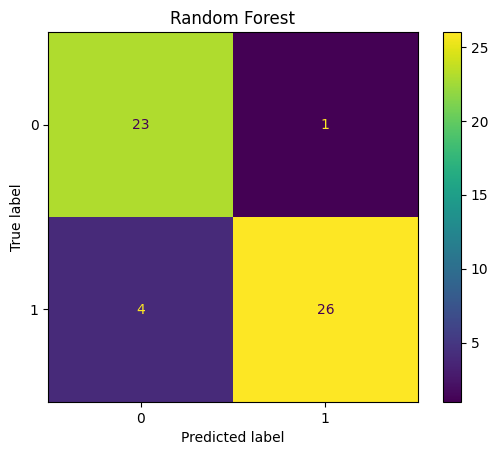

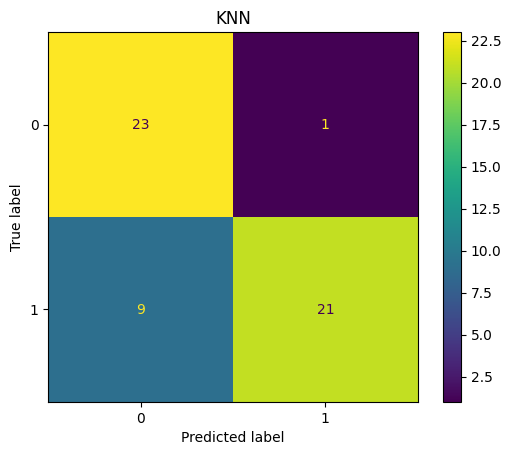

In [129]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [accuracy, f1]
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(name)


for name, [accuracy, f1] in results.items():
    print(f"{name}:\n accuracy is {accuracy:.4f} \n f1 score is {f1:.4f}")

## Fine Tune
### Logistic Regression

In [130]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 10, 1000], #the inverse of regularization strength
    'penalty': ['l1', 'l2']
}

In [131]:
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_

y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Calculate accuracy and F1 score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")
print(f"The best parameters are {best_params_lr}")

Logistic Regression - Accuracy: 0.9074, F1 Score: 0.9123
The best parameters are {'C': 10, 'penalty': 'l1'}


## SVM

In [132]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],  # Relevant for 'poly' kernel only
    'coef0': [0, 1, 2, 3]   # Relevant for 'poly' and 'sigmoid' kernels
}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)  # Using 5-fold cross-validation
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_


y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Calculate accuracy and F1 score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}, F1 Score: {f1_svm:.4f}")
print(f"The best parameters are {best_params_svm}")

SVM - Accuracy: 0.9074, F1 Score: 0.9091
The best parameters are {'C': 10, 'coef0': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


### Random Forest

In [133]:
param_grid_rf = {
    'n_estimators': [10,20,30, 50,80],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,8]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
# Predict using best Random Forest model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Calculate accuracy and F1 score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}")
print(f"The best parameters are {best_params_rf}")

Random Forest - Accuracy: 0.9074, F1 Score: 0.9123
The best parameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


### KNN

In [134]:
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'p': [1, 2,3,4,5,6]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

# Calculate accuracy and F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}")
print(f"The best parameters are {best_params_knn}")

KNN - Accuracy: 0.9074, F1 Score: 0.9091
The best parameters are {'n_neighbors': 1, 'p': 1}


# Test

In [135]:
import load_test
from joblib import load
from keras.models import model_from_json

In [136]:
test_data, test_labels = load_test.load_test_data()

In [137]:
test_labels['label'] = test_labels[0].replace({'face':0, 'house':1})

In [138]:
loaded_scaler = load("save_params/scaler_80_whole.joblib")

In [139]:
test_data = loaded_scaler.transform(test_data)

In [140]:
y_test = test_labels.label

In [141]:
with open ("save_params/autoencoder_80_all.json") as json_file:
   loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("save_params/autoencoder_80_whole.h5")


In [142]:
X_test = loaded_model.predict(test_data)


2/2 [==============================] - 0s 31ms/step


In [145]:
X_test = StandardScaler().fit_transform(X_test)

## Logistic Regression

Logistic Regression - Accuracy: 0.4444, F1 Score: 0.4000


Text(0.5, 1.0, 'Logistic Regression')

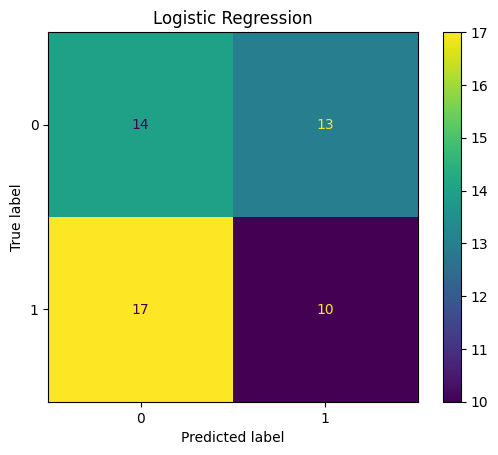

In [146]:
test_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
accuracy_lr = accuracy_score(y_test, test_pred_lr)
f1_lr = f1_score(y_test, test_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")
cm = confusion_matrix(y_test, test_pred_lr, labels=grid_search_lr.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_lr.best_estimator_.classes_)
disp.plot()
plt.title("Logistic Regression")


Support Vector Machine - Accuracy: 0.7963, F1 Score: 0.7660


Text(0.5, 1.0, 'SVM')

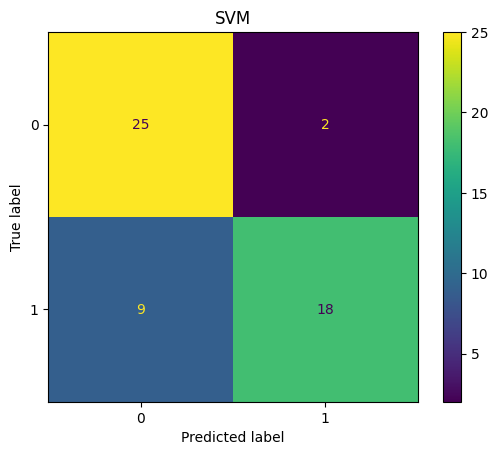

In [147]:
test_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
accuracy_svm = accuracy_score(y_test, test_pred_svm)
f1_svm = f1_score(y_test, test_pred_svm)
print(f"Support Vector Machine - Accuracy: {accuracy_svm:.4f}, F1 Score: {f1_svm:.4f}")
cm = confusion_matrix(y_test, test_pred_svm, labels=grid_search_svm.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_svm.best_estimator_.classes_)
disp.plot()
plt.title("SVM")


Random Forest - Accuracy: 0.9074, F1 Score: 0.6333


Text(0.5, 1.0, 'Random Forest')

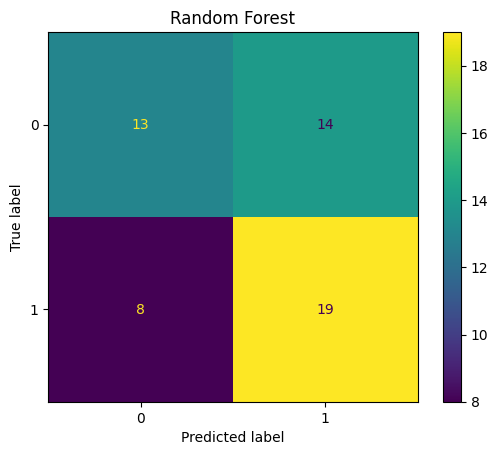

In [148]:
test_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
accuracy_lr = accuracy_score(y_test, test_pred_rf)
f1_rf = f1_score(y_test, test_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}")
cm = confusion_matrix(y_test, test_pred_rf, labels=grid_search_rf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot()
plt.title("Random Forest")


KNN - Accuracy: 0.8333, F1 Score: 0.8000


Text(0.5, 1.0, 'KNN')

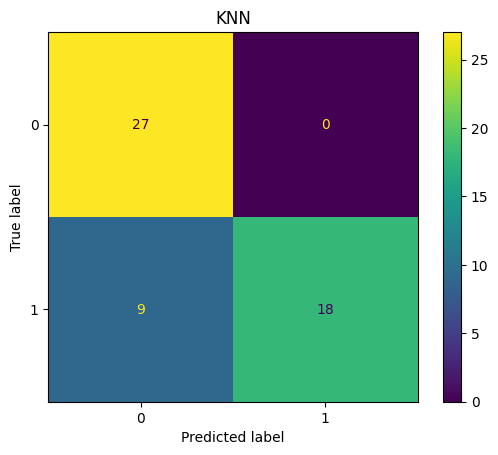

In [149]:
test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
accuracy_knn = accuracy_score(y_test, test_pred_knn)
f1_knn = f1_score(y_test, test_pred_knn)
print(f"KNN - Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}")
cm = confusion_matrix(y_test, test_pred_knn, labels=grid_search_knn.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_knn.best_estimator_.classes_)
disp.plot()
plt.title("KNN")


## Test autoencoder

In [97]:
with open ("save_params/autoencoder_80_all.json") as json_file:
   loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("save_params/autoencoder_80_whole.h5")


In [98]:
from sklearn.metrics import mean_squared_error


In [100]:
test_data, test_labels = load_test.load_test_data()

In [101]:
test_data = loaded_scaler.transform(test_data)

In [102]:
reconstructed_data = loaded_model.predict(test_data)
mse = mean_squared_error(test_data, reconstructed_data)

2/2 [==============================] - 0s 46ms/step


In [103]:
print(mse)

0.2339483


In [105]:
test_data.min()

-8.881336